In [1]:
import pandas as pd
!ls

 atricals			   'prob_tag_with_ pymorphy.ipynb'
 cloze_task_average_accuracy.xlsx   res.csv
 cloze_task_raw_data.xlsx	    result_tag_new.xls
 Compare_data.ipynb		    result_tag_new.xlsx
 diction_for_tag_replacing.ipynb    result_tag_to_compare.xlsx
 LSTM_probability.xlsx		    result_tag.xls
 LSTM_prob_w_pos.xlsx		    tag_clearing.ipynb
 new_comparing.ipynb		    Tag_cloze_task.ipynb
 output.xlsx			    Untitled1.ipynb


drop all rows were we don't have a contex as a stimulus

In [2]:
row_data = pd.read_excel('cloze_task_raw_data.xlsx')
print(row_data.shape)
row_data = row_data[row_data['shown'] != 'Введите первое слово']
print(row_data.shape)

(64645, 16)
(57836, 16)


In [3]:
def clear(x):
    flag=0
    if (len(x)==1) and (x not in 'ксявуоиа'):
        flag+=1
    for i in x:
        if i not in 'ячсмитьбюэждлорпавыфйцукенгшщзхъЯЧСМИТЬБЮФЫВАПРОЛДЖЭЪХЗЩЙЦШУГКНЕ':
             flag+=1
    if flag==0:
        return x
    else:
        return 0
row_data.answer = row_data.answer.astype(str)
row_data.answer = row_data.answer.apply(clear)
row_data = row_data[row_data['answer']!=0]
row_data.shape

(57346, 16)

Count number of different answer for each stimulus and alse a index of confusion for rows.
If in experement we have 16 attempts to add the contex, when index of confusion is equel 16/max(all quantities of responses for each stimulus). Smaller the value of confuision, than we can be more confident about this example)

In [4]:
sub_data = row_data[['shown', 'answer', 'word.id']]
grop_data = sub_data[['shown', 'answer']].groupby('shown').size()
grop_data = grop_data.reset_index(level=['shown'])
grop_data.columns = ['shown', 'summ']
grop_data['confusion'] = 1 - grop_data.summ/max(grop_data['summ'])
grop_data

,shown,summ,confusion
0,А,15,0.978571
1,А промывать,15,0.978571
2,А промывать манную,15,0.978571
3,А промывать манную крупу,15,0.978571
4,А промывать манную крупу перед,15,0.978571
5,А промывать манную крупу перед тем‚,15,0.978571
6,А промывать манную крупу перед тем‚ как,15,0.978571
7,А промывать манную крупу перед тем‚ как варить,15,0.978571
8,А промывать манную крупу перед тем‚ как варить...,15,0.978571
9,А промывать манную крупу перед тем‚ как варить...,15,0.978571


Count the quantity of different response for each stimulus 

In [5]:
grop_dats_0 = sub_data[['shown', 'answer']].groupby(['shown','answer']).size()
grop_dats_0 = grop_dats_0.reset_index(level=['shown', 'answer'])
grop_dats_0.columns = ['shown', 'answer', 'freq']
grop_dats_0.head()

,shown,answer,freq
0,А,вот,1
1,А,где,1
2,А,ему,1
3,А,зачем,1
4,А,знаете,1


Merge tables

In [6]:
data_res =  sub_data.merge(grop_data, left_on='shown', right_on='shown', how='outer')
data_res =  data_res.merge(grop_dats_0, left_on=['shown','answer'], right_on=['shown','answer'], how='outer')
data_res.head()

,shown,answer,word.id,summ,confusion,freq
0,А,вот,промывать,15,0.978571,1
1,А,где,промывать,15,0.978571,1
2,А,ему,промывать,15,0.978571,1
3,А,зачем,промывать,15,0.978571,1
4,А,знаете,промывать,15,0.978571,1


count the prob

In [7]:
import numpy as np
data_res['prob'] = np.where(data_res['word.id']==data_res['answer'], data_res.freq/data_res.summ, 0)
data_res

,shown,answer,word.id,summ,confusion,freq,prob
0,А,вот,промывать,15,0.978571,1,0.0
1,А,где,промывать,15,0.978571,1,0.0
2,А,ему,промывать,15,0.978571,1,0.0
3,А,зачем,промывать,15,0.978571,1,0.0
4,А,знаете,промывать,15,0.978571,1,0.0
5,А,зори,промывать,15,0.978571,1,0.0
6,А,когда,промывать,15,0.978571,1,0.0
7,А,кто,промывать,15,0.978571,1,0.0
8,А,он,промывать,15,0.978571,1,0.0
9,А,петя,промывать,15,0.978571,1,0.0


check: did I lost some examples or not, as we can see the 

In [8]:
data_res = data_res.drop_duplicates()
j = data_res[['shown', 'prob']].groupby('shown').sum()
j = j.reset_index(level=['shown'])
k =  j.merge(data_res[['shown','word.id']], left_on=['shown'], right_on=['shown'], how='outer')
k = k.drop_duplicates()
s = k.groupby(['shown','word.id']).sum()
s = s.reset_index(level=['shown', 'word.id'])
result = data_res[['shown', 'word.id', 'prob', 'confusion']]
result = result.drop_duplicates()
print(result.shape, s.shape)
result['is_dub'] = result[['shown', 'word.id', 'confusion']].duplicated(keep=False)
g =  result.query('(is_dub == True & prob > 0)|(is_dub==False)')
g

(1853, 4) (1222, 3)


,shown,word.id,prob,confusion,is_dub
0,А,промывать,0.000000,0.978571,False
15,А промывать,манную,0.000000,0.978571,False
40,А промывать манную,крупу,0.333333,0.978571,True
45,А промывать манную крупу,перед,0.000000,0.978571,False
60,А промывать манную крупу перед,тем,0.000000,0.978571,False
75,А промывать манную крупу перед тем‚,как,1.000000,0.978571,False
90,А промывать манную крупу перед тем‚ как,варить,0.666667,0.978571,True
105,А промывать манную крупу перед тем‚ как варить,ее,0.266667,0.978571,True
123,А промывать манную крупу перед тем‚ как варить...,не,0.600000,0.978571,True
135,А промывать манную крупу перед тем‚ как варить...,пробовали,0.000000,0.978571,False


In [9]:
sub_data[['shown','word.id']].drop_duplicates().shape

(1222, 2)

compute median and plot it

/home/semen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


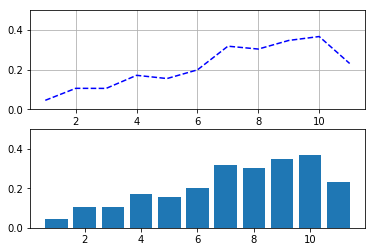

In [12]:
import matplotlib.pyplot as plt 

plot_data = g[['shown', 'prob']]
def get_len(x):
    return len(x.split())

def plot_mean_prob_distribution(plot_data):
    plot_data['context_len'] = plot_data.shown.apply(get_len)
    x1 = plot_data.groupby('context_len').sum()
    x1 = x1.reset_index(level=['context_len'])
    x2 = plot_data.groupby('context_len').size()
    x2 = x2.reset_index(level=['context_len'])
    plotting = x1.merge(x2, left_on = 'context_len', right_on = 'context_len', how = 'outer')
    plotting.columns = ['context_len', 'prob', 'abs_freq']
    plotting['frequency'] = plotting['prob']/plotting['abs_freq']
    
    plt.subplot(211)
    plot1, =plt.plot(plotting.context_len.tolist(), plotting.frequency.tolist(), 'b--', label="$y=x^2$")
    plt.ylim(0,0.5)
    plt.grid()

    plt.subplot(212)
    plt.bar(x= plotting.context_len.tolist(), height = plotting.frequency.tolist())
    plt.ylim(0,0.5)

    _=plt.show()
    
plot_mean_prob_distribution(plot_data)

/home/semen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


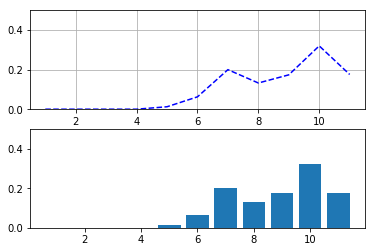

In [16]:
import numpy as np

def tl(x):
    d = []
    d.append(x)
    return d

def mediann(x):
    return np.median(x)

def plot_median_distribution(plot_data):
    
    plot_data['context_len'] = plot_data.shown.apply(get_len)
    plot_data.prob = plot_data.prob.apply(tl)
    x1 = plot_data.groupby('context_len').sum()
    x1 = x1.reset_index(level=['context_len'])
    plotting = x1

    plotting['mediann'] = plotting['prob'].apply(mediann)

    plt.subplot(211)
    plot1, =plt.plot(plotting.context_len.tolist(), plotting.mediann.tolist(), 'b--', label="$y=x^2$")
    plt.ylim(0,0.5)
    plt.grid()

    plt.subplot(212)
    plt.bar(x= plotting.context_len.tolist(), height = plotting.mediann.tolist())
    plt.ylim(0,0.5)

    _=plt.show()

    
plot_median_distribution(plot_data)

In [18]:
lstm = pd.read_excel('LSTM_prob_w_pos.xlsx')

In [19]:
lstm[['shown','answer']].drop_duplicates().shape

(1312, 2)

In [20]:
sub_lstm = lstm[['shown','answer', 'prob', 'pos.tag']]
sub_lstm = sub_lstm[sub_lstm.shown != 'Введите первое слово']
sub_lstm.shape

(1223, 4)

/home/semen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


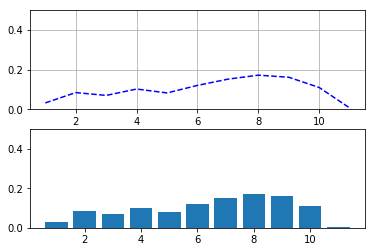

In [21]:
plot_data_lstm = sub_lstm[['shown', 'prob']]
plot_mean_prob_distribution(plot_data_lstm)

/home/semen/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/semen/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


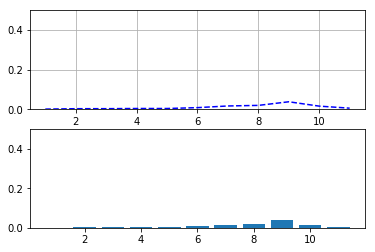

In [22]:
plot_median_distribution(plot_data_lstm)

In [122]:
ggg = g.merge(sub_lstm, left_on=['shown','word.id'], right_on=['shown','answer'], how='outer')
ress = ggg[['shown','word.id', 'prob_x', 'confusion', 'prob_y', 'pos.tag']]
ress

,shown,word.id,prob_x,confusion,prob_y,pos.tag
0,А,промывать,0.000000,0.978571,1.986770e-07,INFN
1,А промывать,манную,0.000000,0.978571,9.952960e-06,ADJF
2,А промывать манную,крупу,0.333333,0.978571,9.152956e-02,NOUN
3,А промывать манную крупу,перед,0.000000,0.978571,7.796750e-04,PREP
4,А промывать манную крупу перед,тем,0.000000,0.978571,1.503523e-02,CONJ
5,А промывать манную крупу перед тем‚,как,1.000000,0.978571,9.661542e-01,CONJ
6,А промывать манную крупу перед тем‚ как,варить,0.666667,0.978571,1.186796e-02,INFN
7,А промывать манную крупу перед тем‚ как варить,ее,0.266667,0.978571,4.090891e-02,NPRO
8,А промывать манную крупу перед тем‚ как варить...,не,0.600000,0.978571,1.469520e-01,PRCL
9,А промывать манную крупу перед тем‚ как варить...,пробовали,0.000000,0.978571,8.291220e-04,VERB


In [125]:
row_data.shape

(57346, 16)

In [128]:
len(row_data.answer.tolist())

57346